<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Hydraulics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hydraulics

Authors: Jonathan Harris, Matthew Snyder, Ke Xu

[/Monroe/]: # (You added a few simple calculations. The report can be strengthen by adding discussion about flow splitting, valves or gates that could be used to turn sections of the plant off for maintenance, and multiple plan view sketches of how channels could deliver water to and extract water from the various units. The end of the semester is coming soon and the amount of effort to date isn't matching the project timeline. There isn't evidence yet that you've thought about flow division. See the hydraulics chapter of the AguaClara textbook. There may also be a section on this in MWH. I found a reference in Chpater 6 Elements of Detailed Designs in Integrated Design and Operation of Water Treatment Facilities by Susumu Kawamua with this advice that includes minimum velocity for sludge. You might also find google maps of large WTPs that would allow you to see how they transfer water to multiple sed tanks.)

see [page from Kawamua](https://photos.app.goo.gl/fBWUG31KimHAmVzk8)

[/Monroe/]: # (In AguaClara plants we have one long channel to distribute flow to sed tanks and another long channel to collect the flow from the sed tanks. How big would those channels be if you used that same design for Fairmont? How much of the plan view area of the plant would be occupied by those channels? Are there any ways to reduce the required area taken up by the channels?)

[/Matt/]: # (My first thought is to look into deeper channels so that the width may be able to be smaller. Is that a reasonable assumption or should we need to look into a different way?)

[/Monroe/]: # (Yes, deeper channels will be needed! This flow is 200 times larger than any AguaClara plant. I think you need to draw some quick sketches. You used my random guesses in Fairmont.py and calulated that the area left for the channels was negative. Don't simply do a calculation and present it without any comments. That implies that you don't see any challenges in designing channels using negative plan view area.)




In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 3.7MB/s 
     |████████████████████████████████| 163kB 16.2MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=b98dad224ac2ee19eb0d39f490035783fcda899661a25b7accc0e350c8e0df4e
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=bc0bdc518fcdce5752d7459ff9e9f8d379e948fb28bde33554c3c880b9e03852
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 3.1MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import aguaclara.core.physchem as pc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-18 13:04:22--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3057 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.99K  --.-KB/s    in 0s      

2020-05-18 13:04:23 (42.5 MB/s) - ‘Fairmont.py’ saved [3057/3057]



# Task Definition

Simply put, hydraulics involved getting the water through the plant. This task can involve anything from splitting water into different trains to simply getting water into each unit process. This plant is a flocculation and sedimentation plant with gravity powered transport of water. Thus, head calculations are critical to make sure there is enough power to get the water through the plant. The average flow of this plant is around 207 MGD, with a peak flow as high as 465 MGD. Additionally, there will be an addition of coagulation, rapid mix, flocculation and finally sedimentation unit processes. These processes will be constrained to happening one after another in a sequential order so that the water can move through on gravity alone.
 
Conventional treatment practices show that there should be sufficient trains of water so that if part of the plant needs to be shut down for maintenance or cleaning, the whole plant does not need to shut down. Keeping this in mind, a treatment plant should have at least two trains. However, if there are only two trains and one is down, then one train will need to be big enough to hold the capacity of the max flow of the plant, which is not ideal. That is why there should be at least three different flow patterns that water can travel so that one can be down and there will still be two trains left to handle even the peak flow.
 
This can be done in many ways. The first way would be to have three separate trains that are identical in every way. That is, they have the same number of each process. This is hard to do, especially using gravity as the power source, because this would require a lot of space. 

 ![alt text](https://drive.google.com/uc?id=1-oEiGO-Uvdc2MzwP6UFg6JT-jU12HT0u)

An additional model could be to add more individual modules to each unit process. For example, this could be two rapid mix units, three flocculators and four sedimentation tanks. So that one rapid mix could be offline without disrupting any of the other unit processes.

 ![alt text](https://drive.google.com/uc?id=1gr4L6FPkaMUrKfec8dRGqTYjqw3XmIM_)

Using the second approach to this design seems to be the best way to do this. So, the goal of the hydraulics team will be to design an open channel, gravity-powered flow from the start to the end where each process will have the water split into it and then brought back together to be distributed into the next unit process. For rapid mix this would mean allowing the water to flow into different channels at the start of the plant that can be closed off to flow when that rapid mix is offline. For flocculation, this will mean taking the water from the rapid mix and having it enter flocculators so that any flocculators can be blocked of flow when they are offline. In the sedimentation tanks, the flow will go down a large open channel with outlets into each sedimentation tank and each of those outlets can be blocked if the sedimentation tank is offline. At the end of the sedimentation tanks, the water will flow into another open channel so that at the end of the plant all of the water enters one final channel then can flow into the reservoir.
 
[/Monroe/]: # (Good discussion here. Now create sketches to show both of these ideas. 1- treatment trains that are either all on or all off and 2- unit processes where small units can be taken off line.) 

[/Matt/]: # (Added Sketches.)

# Executive Summary 

Highlight dominant constraints and your recommendation for the design.


# Constraints
* Relevant regulations
    * [California Drinking Water Standards](https://www.waterboards.ca.gov/drinking_water/certlic/drinkingwater/Lawbook.html)
    * 10 State Standards
    * [2012 Recommendations](https://www.health.state.mn.us/communities/environment/water/docs/tenstates/waterrev2012.pdf)
    * [OSHA requirements of confined space and trench excavations](https://www.osha.gov/Publications/osha2226.pdf)
* client expectations
    * Being able to treat a wide range of flow rates
    * Take a train offline without disrupting the plant
    * Having a redundant treatment train
* site and budget
    * With such a wide range of flow rates, how can there be an adequate amount of flow splits while also not making the plant too large and expensive
    * Can we have all of the treatment trains needed in the site limits?
* process capabilities including process design equations
    * Fluid Mechanics
    * Looking at channel dimensions so that there is adequate flow to all the treatment trains and sedimentation tanks
    * What will the channels look like? This will greatly depend on what other teams decide
* ease of use 
    * Channels and pipes that can take the various flow rates to be experienced
    * Operators will need to worry about:
        * Opening/closing treatment trains
        * Changing chemical dosages
    * Budget vs Ease of Use
* operation requirements
    * What amount of skills will be req to operate?
        * What do operators need to know and calculate?
        * How will they know when to open/close treatment trains?
        * How much will be automated?
* maintainence requirements
    * Life-time of valves
* Pressure Recovery
  * conversion from kinetic to potential energy will determine the necessary depth of the channels
* Minimum velocity in the channel of 0.15 m/s (10 State Standards)
  * This will be used to set the depth and width of the channels
  * How can the depth and width be changed without compromising 
# Physics

[/Monroe/]: # (You missed two of the major constraints. 1- Pressure recovery rather than head loss will likely control flow distribution and will set maximum velocities in flow distribution channels. 2- Minimum velocity will be set by the goal of preventing sedimentation in the channels. This is set by a scour velocity and this is likely what has historically set the minimum velocity for channel flow in wtps. )
[/Jonathan/]: # (addressed and added to constraints.)

* Pressure recovery: Bernoulli's equation
$$z_A+\frac{v_A^2}{2g}+\frac{P_A}{\gamma}=z_B+\frac{v_B^2}{2g}+\frac{P_B}{\gamma}$$

* Head loss
    
    Darcy-Weisbach equation
    $$ h_f= \lambda\frac{L}{D} \frac{V^2}{2g}$$
    Manning equation
    $$ Q=\frac{1.49}{n} A R^(\frac{2}{3})S^(\frac{1}{2})$$
    Swamee-Jain equation
    $$f=\frac{0.25}{[log(\frac{\epsilon}{3.7D}+\frac{5.74}{Re^(0.9)})]^2}$$

* Open channel Flow equations: Manning's Equation

[/Monroe/]: # (Your equation wasn't formatted correctly. It is easy to fix using codecogs if you are not yet familiar with Latex.)

$$ Q = (1/n)*KA R^{2/3} S^{1/2} $$

[/Monroe/]: # (I am opposed to using equations that are dimensionally incorrect especially when we have equations that are dimensionally correct. Pipe flow equations can be used for open channels.) 
[/Ingrid/]: # (addressed.)



# Table listing potential strategies to meet the constraints and treatment objectives


| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Reading relevant regulations | Knowing what will need to be done for the design | Time consuming | all relevant local, state, and federal regulations |
|Clear communications with client|No mysteries between us and the client|Time consuming, Client may not want to hear about what **can't** be done|Correspondence method with clients|
| Constant Communication with other teams | Will know important info as it becomes available |Will have to rely on other teams for information | N/a |
| Including lifetime of valves when looking at treatment trains | Holistic view of cost of treatment | Time needed for vendor locating, may not be necessary | vendors of valves |
| **Reading relevant regulations** | Knowing what will need to be done for the design | Time consuming | all relevant local, state, and federal regulations |
|**Clear communications with client**|No mysteries between us and the client|Time consuming, Client may not want to hear about what **can't** be done|Correspondence method with clients|
| **Constant Communication with other teams** | Will know important info as it becomes available |Will have to rely on other teams for information | N/a |
|**Sliding doors to open/close channels**|Can be made to fit what ever channel dimensions are made|would they be manual (operator has to do it)? automatic(could break)?|Find out what other plants do|
|**Deeper channels**|Decreases area needed|Construction feasbility, how deep would we go?|area of other parts of the plant|
|**Weirs along inlet channel to sedimentation tanks**|During lower flow rates, tanks not needed wont be used|Variable flows may lead to trains going on and off|Look at the variability of the flows and what that means for|


[/Monroe/]: # (I think you realized that these are large flows, but you didn't do ANY calculations to see what the dimensions might be. Flow control to enable taking a treatment train offline will be one of the fun design challenges and I doubt that you will be using valves at this scale. )
[/Jonathan/]: # (Added new strategies, calculated the area, it is 45 m^2 so yeah a valve is probably not the best option!)

# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [3]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors


,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN
9,decanter centrifuge (resid) GN Solids Control...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# Major Decisions

The first major decision is to think about the treatment trains. How many trains will the plant have? And, what is the most effective way to have trains so that the least amount of processes would need to be shut down? To answer this the decision was made to effectively only have one train. That is, have each single unit of the unit process be able to be offline without any other downstream process needing to be offline. This is the best way to go about this but does also bring up some other rather large decisions.
 
The next major decision that needs to be made is how big can these channels be. This plant is rated to move a lot of water through its processes and therefore will require some large channels. This will take up a lot of space and can also cause serious construction limitations. The strategy to come to a choice is to do some preliminary calculations and then also add in how many of each process we will have. Then we can add or subtract from there. To get this information we will need to look at the preliminary designs from each team.
 
Another big decision that needs to be made is how to take a treatment train or unit process offline. Once again, since there are large flows involved in this plant simple valves may not be strong enough to stop the flow out of the channel. References from other plants this size will be needed so that we can gauge all options. We can also design what we think will work then address its feasibility with others.
 
In order to get the water from open channels to multiple sedimentation tanks, using a large channel with outlets to each tank seems to be the best option. However doing this will lead to a large plan view area for these channels. There is not a lot of space for this plant so having a large area taken up by these channels may not work for construction purposes. Moving forward, the area of these channels will be calculated and compared to the area of the rest of the plant to see just how much space will be taken up. Additionally, further research will be done into how to make the plan view area of these tanks smaller whether that is making them deeper or potentially having a couple channels.


# Next Steps and Challenges

Next steps are to continue to get data needed from each of the unit processes so that our design may be furthered or edited as needed. We will also need to figure out the best way to take a train offline and cut-off these large flows from the process. This is also a major challenge because indications are that a simple valve may not be big or strong enough to handle the flows of the plant. Additionally, the dimensions of these channels will need to be kept in mind. At the end of the day we could end up with big enough channels to account for more than half of the area of the plant and that would not be ideal. So, we will need to check these dimensions and adjust certain parameters so that they are not that large in comparison. This is also a challenge because these channels cannot be such that particles start to settle out and block potential flow. We also have the challenge of the size such that channels for sedimentation tanks will become overly large and not be feasible to construct or maintain.

# Flow Splitting
The plant will have plenty of variability in flow. The sedimentation tanks, in particular, need to have the ability to run in any number of configurations to accommodate the different flows. Therefore, the water will need to be split into multiple sedimentation tanks so that the tanks can be run in any set in order to accommodate flow. This is the major splitting of the water necessary for the plant. Below is a sample configuration for discussion:
 
![alt text](https://drive.google.com/uc?id=1EA6UTVM7dSfAVRIA5woZqRI0mmoCmRjn)
 
This example shows six different sedimentation tank units that can be shut off using a gate on the influent side. In this type of tank the flow will be split four times. The first split is off the main channel (blue), second into either side of the sedimentation tank  (orange), third into a plate settler and finally deposited into the effluent (yellow) where the water is free to flow into the reservoir. Any of these six tanks can be taken offline using the black gate off of the main channel. This allows for the plant to take on the smallest and largest flows possible. The figure below shows the cross-section of a sedimentation tank unit with a possible flow path shown.
 
![alt text](https://drive.google.com/uc?id=1a7iNuPTlB8SBk9f5aQoCL-5Z6mlTLcay)
 
Additionally to add water back into the unit, there is another gate (shown in purple) to add settled water back into the unit. This is where the effluent would meet the influent water in the channel just before the sedimentation tanks. This will allow to take tanks on and offline without worrying about floc breakout. As seen in the cross-sectional of the sedimentation unit, the effluent will be at a lower height than the influent water (although it is exaggerated for effect). This helps the water to flow downhill into the reservoir and the free flowing drop will also help with flow distribution into the effluent. While the settled water will not be able to fully fill the tank, the influent gate can be opened slowly enough to fill the small amount left. Doing this will make any break-up negligible.
 
The most important constraints in this are the velocities in the channels and the pressure recovery in this process. It is known that in order to not break-up flocs, the velocity in the channel should be around 0.3 m/s (0.15-0.4 m/s). Therefore, the channel will be constrained to this and quite possibly will be very large in which the depth of the channel may be to be tweaked as it is set to the depth of the sedimentation tanks currently. The calculations for this constraint are below. The other main constraint is the pressure recovery. The highest flow will be at the last plate settler furthest from the inlet of the main channel. Therefore, the pressure at the beginning plates will need to be accounted for and is calculated and discussed further below. 
 

# Design

Begin writing the code to start your design. Define flow rates, mass rates, energy requirements, and any readily calculated dimensions, velocities, flows, etc.

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy
The range of channel areas are ( 45 meter ** 2 , 135 meter ** 2 )
The final area used: 67.96 meter ** 2
The pressure recovery that would happen in the channel is 4.589 millimeter . 

The width of the channel based on the sedimentation tank depth is 23 meter 

The area available for a hydraulic plant is -4071 meter ** 2
The area available for a mechanical plant is -4035 meter ** 2 

Manifold diameters: 147.1 centimeter 104 centimeter 84.92 centimeter 73.54 centimeter 65.78 centimeter 60.05 centimeter 55.59 centimeter 52 centimeter 49.03 centimeter 46.51 centimeter 



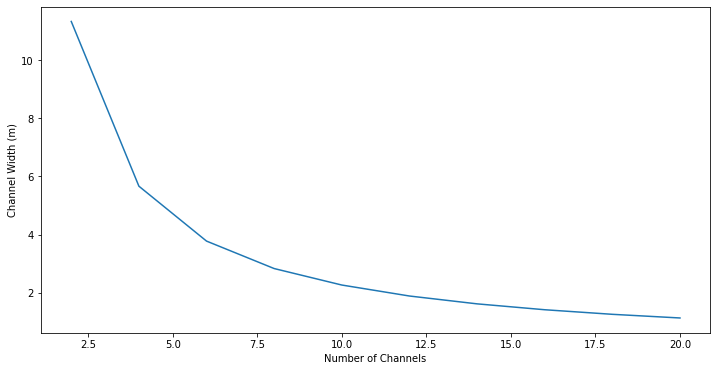

Channels:
 Channel Splits  Area(m2)  Width(m)  PipeID(m)
              2     33.98     11.33      6.578
              4     16.99     5.663      4.651
              6     11.33     3.776      3.798
              8     8.495     2.832      3.289
             10     6.796     2.265      2.942
             12     5.663     1.888      2.685
             14     4.854     1.618      2.486
             16     4.248     1.416      2.326
             18     3.776     1.259      2.193
             20     3.398     1.133       2.08


In [4]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')


# Rough Channel Area calculations
minvel = 0.15*u.m/u.s
maxvel = 0.45*u.m/u.s
areas = np.array([0,0])*u.m**2
areas[0] = fmt.q_max/maxvel
areas[1] = fmt.q_max/minvel
print('The range of channel areas are (', areas[0],',',areas[1],')')

# we will use a velocity of 0.3 m/s

vel = 0.3*u.m/u.s
area = fmt.q_max/vel
pressure_recovery = vel**2/(2*ac.GRAVITY)
# assuming the is the minimum channel depth needed
print('The final area used:',area.to(u.m**2))
width_channel = (area/pressure_recovery).to(u.m)
print('The pressure recovery that would happen in the channel is',pressure_recovery.to(u.mm),'.','\n')

# Looking at modeling after the sed tank depth:
depth_sed = 3 * u.m
width_channel_sed = area/depth_sed
print('The width of the channel based on the sedimentation tank depth is',round(width_channel_sed.to(u.m)),'\n')

# Can use AguaClara PhysChem functions https://aguaclara.github.io/aguaclara/core/physchem.html
openchannel = True

# Determining area available for channels
# Calculate areas of unit processes
A_rm_hyd = fmt.n_rm_hyd * fmt.L_rm_hyd * fmt.W_rm_hyd 
A_rm_mech = fmt.n_rm_mech * fmt.L_rm_mech * fmt.W_rm_mech 
A_floc_hyd = fmt.n_floc_hyd * fmt.L_floc_hyd * fmt.W_floc_hyd
A_floc_mech = fmt.n_floc_mech * fmt.L_floc_mech * fmt.W_floc_mech 
A_sed_hyd = fmt.n_sed_hyd * fmt.L_sed_hyd * fmt.W_sed_hyd 
A_sed_mech = fmt.n_sed_mech * fmt.L_sed_mech * fmt.W_sed_mech

# Potential areas
A_channel_hyd = fmt.project_a - (A_rm_hyd + A_floc_hyd + A_sed_hyd)
A_channel_mech = fmt.project_a - (A_rm_mech + A_floc_mech + A_sed_mech)
print('The area available for a hydraulic plant is',A_channel_hyd)
print('The area available for a mechanical plant is',A_channel_mech,'\n')

# Channel Splits
n_channels = np.array([2,4,6,8,10,12,14,16,18,20]) # range of possible number of channel splits. Each channel split feed 2 sedimentation tanks
channel_area = area/n_channels
#print('Channel areas:',*channel_area.to(u.m**2))
diameters = 2*((channel_area/np.pi)**.5)
channel_width = channel_area/depth_sed
#print('Channel Widths:', *channel_width.to(u.m))
#print('Pipe diameters:', *diameters.to(u.m))
channels = pd.DataFrame()
channels['Channel Splits'] = n_channels
channels['Area(m2)'] = channel_area.to(u.m**2)
channels['Width(m)'] = channel_width.to(u.m)
channels['PipeID(m)'] = diameters.to(u.m)
# we do not know how many manifolds there will be in the sed tank, currently a variable and will be updated after information from the sed teams
n_manifolds = 20
sed_area = channel_area/n_manifolds
diameter_manifold = 2*((sed_area/np.pi)**.5)
print('Manifold diameters:', *diameter_manifold.to(u.cm),'\n')

# These will be pipes, calculate ND,OD of pipes
ID=(area/np.pi)**0.5

# ND is chosen with concidering the price, pressure of the pipe needed
plt.figure(figsize=[12,6])
plt.plot(channels['Channel Splits'],channels['Width(m)'])
plt.xlabel('Number of Channels')
plt.ylabel('Channel Width (m)')
plt.show()

print('Channels:')
print(channels.to_string(index=False))

In [5]:
# head loss
# variables
n = 0.010 # Manning's n, range: 0.010-0.013
R = 1 # find hydraulic radius
S = 0.01 # find channel slope
FlowRate = fmt.q_ave.to(u.Mgal/u.day)

# based on the assumption of the laminar flow
# using Darcy-Weisbach equation
# pc.headloss_fric(FlowRate, Diam, Length, Nu, PipeRough)


# using Swamee-Jain equation
pc.fric(FlowRate, Diam, Nu, PipeRough)

def manningsV(n,R,S):
  # n is the mannings coeffecient
  # R is the hydraulic radius
  # S is the slope of channel
  (1/n)*R**(2/3)*S**.5

def manningsloss(n,L,Q,D):
  # n is the mannings coeffecient
  #taken: https://www.slideshare.net/louyalhamy/hydro-chapter3-by-louy-al-hami
  (10.3*(n**2)*L*(Q**2))/(D**(16/3))



NameError: ignored

In [6]:
# port velocity
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow):
  return np.sqrt((Ratio_flow**2 + 1)/(2*(1-Ratio_flow**2)))

Ratio_flow = 0.85 # based on flow of first and last port in diffuser 
# ask sed team why

# assume celovity in main channel will be the velocity in the manifold
vel_port = vel * Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
print(vel_port)
pressure_recovery = vel_port**2/(2*ac.GRAVITY)
print(pressure_recovery.to(u.cm))

0.5285 meter / second
1.424 centimeter


In [7]:
# slope
L_sed =40*u.m
W_channel = channels['Width(m)'][1]*u.m
L_tot = L_sed*4 + W_channel*2
S = pressure_recovery/L_tot
print(S.to(u.dimensionless))

8.313e-05 dimensionless


# Analysis

## Pressure Recovery
The pressure recovery is calculated using the equation:

$$ Pressure \space Recovery = \frac{V^2}{2g}, $$
however, the calculated length is so tiny that the depth of the channel will really depend on this calculation. The pressure recovery is only 4.589 mm.

-Jonathan

## Head Loss
The head loss in longest channel is calculated in three ways to find the actual impact to the whole system.

## Sedimentation Inlet Channel Width
The next depth used to calculate the channel width was the depth of the hydraulic sendimentation tank of 3 meters. This depth leadsto a channel width of 23 meters. 

As the team was looking at ways to save space, we thought about decreasing the channel width as the plant split off. However, one potential issue with that design is if early sedimentation tanks are turned off, and the channel downstream would need to be able to handel the full flow.

## Sloped Bottom vs decreasing channel width
sloping the channel bottom
[Equation 655](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-manifold-max-v-no-hl-series)

### constant slope vs slope up at slipt


## Worst Case Scenario: Lowest Flowrate expected:

as turning off capacity, what is lowest you can go with

-jonathan

 Channel Splits  Area(m2)  Width(m)  PipeID(m)  V_low(m/s)
              2     33.98     11.33      6.578     0.07736
              4     16.99     5.663      4.651      0.1547
              6     11.33     3.776      3.798      0.2321
              8     8.495     2.832      3.289      0.3094
             10     6.796     2.265      2.942      0.3868
             12     5.663     1.888      2.685      0.4642
             14     4.854     1.618      2.486      0.5415
             16     4.248     1.416      2.326      0.6189
             18     3.776     1.259      2.193      0.6963
             20     3.398     1.133       2.08      0.7736


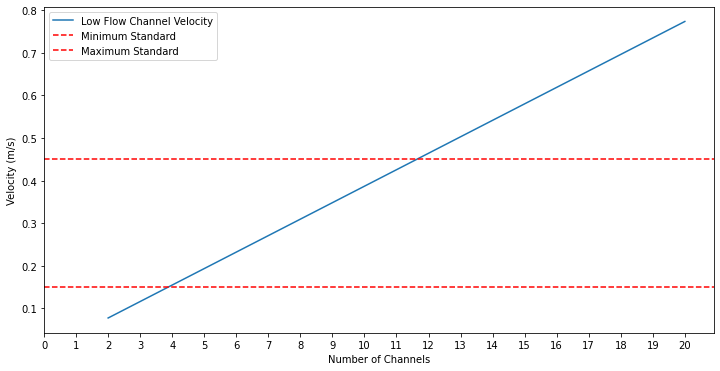

In [15]:
# Worst Case Scenario
q_low = fmt.q_min
v_low = q_low/(channel_area)
#print(*v_low.to(u.m/u.s))
channels['V_low(m/s)'] = v_low.to(u.m/u.s)
print(channels.to_string(index=False))
# would need a minimum of 8 Channel Splits 

plt.figure(figsize=[12,6])
plt.plot(channels['Channel Splits'],channels['V_low(m/s)'],label='Low Flow Channel Velocity')
plt.xlabel('Number of Channels')
plt.ylabel('Velocity (m/s)')
plt.axhline(y=0.15,ls='--',c='r',label='Minimum Standard')
plt.axhline(y=0.45,ls='--',c='r',label='Maximum Standard')
#plt.axvline(x=8,ymax=0.35,label='8 Treatment Trains',c='b')
plt.xticks(np.arange(0, 21, 1.0))
plt.legend()
plt.show()

## Available Area
The Fairmont.py file contains the length, width, and number of unit processes. These were used to calculate the available area in the plant for channels. With the values in the file currently, there is negative space for the channels. Hopefully, as teams update the values in the available area will become clear. Also, it may be better for the Hydraulics team to reach out to each team to see what their processes are looking like in order to design their channels. 

# hydraulic head profile (maybe?)

```
# This is formatted as code
```



# Cost Estimate 

A simple estimation of the possible cost for the design is implemented here to better visualize the project. 

| ITEM | QTY  | UNIT PRICE | COST | 
|---|---|---|---|
| Concrete | 210 | 735 dollar/cy | 735000 |  
| Excavation | 20 | 200 dollar/hour | 4000 |
| **Total** | | |**775000** |